In [1]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from   scipy.integrate import solve_ivp as ode45
import numpy as np

%matplotlib widget
plt.ioff()

def plot_sets(ax,gr=False,ti='',xla=False,yla=False,zla=False,xli=False,yli=False,zli=False,ticks_off=False,xticks_off=False,yticks_off=False,zticks_off=False, ba=False, ar=False,leg=False,view=False):
    
    ax.set_title(ti)
    if gr:  ax.grid(gr);ax.set_axisbelow(True)
    if xla: ax.set_xlabel(xla)
    if yla: ax.set_ylabel(yla)
    if zla: ax.set_zlabel(zla)

    if xticks_off: ax.set_xticklabels([])
    if yticks_off: ax.set_yticklabels([])
    if zticks_off: ax.set_zticklabels([])

    if   ticks_off==1: ax.set_xticklabels([]); ax.set_xticks([]);ax.set_yticklabels([]); ax.set_yticks([])
    elif ticks_off==2: ax.set_xticklabels([])
    elif ticks_off==3: ax.set_yticklabels([])

    if ba: ax.set_box_aspect(ba)
    if ar: ax.set_aspect(ar)

    if xli: ax.set_xlim(xli)
    if yli: ax.set_ylim(yli)
    if zli: ax.set_zlim(zli)

    if leg: ax.legend(**leg)

    if view:ax.view_init(**view)
 
px2inch = 1/plt.rcParams['figure.dpi']

## Custom styles
##################
plt.rcdefaults()

FS = 14

plt.rc('axes'  ,titlesize=FS) # title
plt.rc('axes'  ,labelsize=FS+1) # xy-labels font
plt.rc('grid'  ,linewidth=0.5) 
plt.rc('grid'  ,alpha=0.5)
plt.rc('grid'  ,linestyle='-.') 

#plt.rc('axes'  ,facecolor='whitesmoke')
plt.rc('xtick' ,labelsize=FS) # x-ticks font
plt.rc('ytick' ,labelsize=FS) # x-ticks font 

plt.rc('legend',fontsize =FS-1) # legend font
plt.rc('legend',facecolor='w')
plt.rc('lines' ,linewidth=0.75)   

plt.rcParams.update({
    "text.usetex": False,
    "font.family": "serif",
    "font.serif": "Times New Roman",
    "font.size":FS-2
})

In [2]:

def f(x):
    return 1/4 * x**4 - 1/2*x**2

def dfdt(t,y,b):

    return np.array([ [ y[1]               ],
                      [ y[0]-y[0]**3-b*y[1]], ]).flatten()


In [3]:
nframes = 1000

tf   = 50
t    = np.linspace(0,tf,nframes)

lim  = 1.85
x    = np.linspace(-lim,lim,nframes)

b1   = 0
y01  = np.array([-1.7,
                  0.0])

b2   = 0.1
y02  = np.array([-1.7,
                  0.0])

# Potencial function P
P = f(x)

N_arrows = 20

def get_data(y0,b):

        # Phase Space, compute vector field Sx,Sy,Su,Sv
        klim  = 0.1
        sxy   = np.linspace(-lim+klim,lim-klim,N_arrows)
        Sx,Sy = np.meshgrid(sxy,sxy)
        Y     = np.zeros((2,N_arrows **2))

        for i,(sx,sy) in enumerate( zip(Sx.flatten(),Sy.flatten()) ):
                y      = np.array([sx,sy])
                Y[:,i] = dfdt(t,y,b)

        Y  = Y / np.sqrt( np.sum(Y**2,axis=0) )
        Su = Y[0,:].reshape((N_arrows,N_arrows))
        Sv = Y[1,:].reshape((N_arrows,N_arrows))

        # Integrate the dfdt(t,y)
        sol   = ode45(dfdt,(0,tf),y0,t_eval=t,args=(b,))
        phase = sol.y
        px = phase[0,:]
        py = phase[1,:]

        return Sx,Sy,Su,Sv,px,py

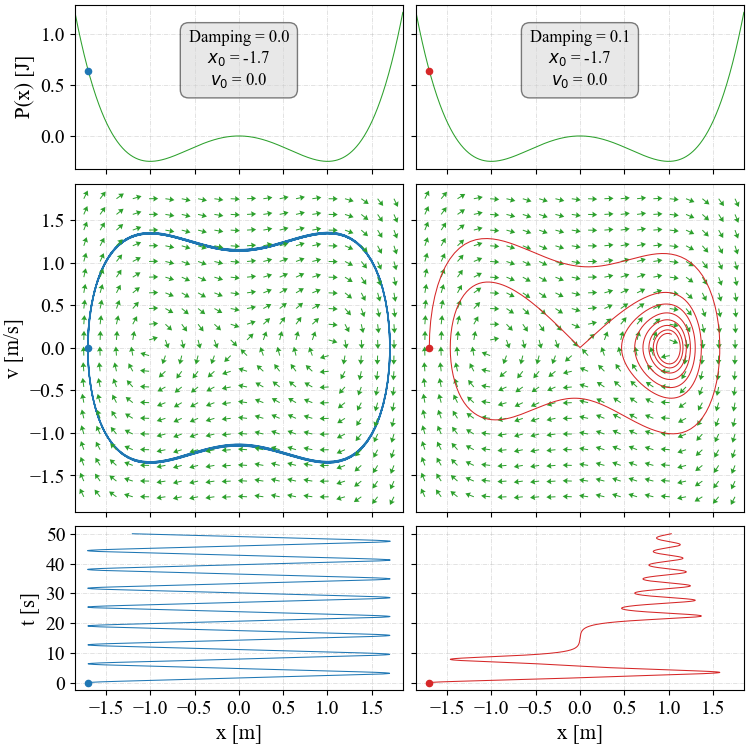

In [6]:
aspect_ratio = 1
cm2in        = 1/2.54
figw         = 19*cm2in
figh         = figw*aspect_ratio**-1 
fig, ax      = plt.subplots(3,1,constrained_layout=True,figsize=(figw,figh),sharex=True)
ax           = ax.flatten()

fig, ax      = plt.subplot_mosaic([[0,0,3,3],
                                   [1,1,4,4],
                                   [1,1,4,4],
                                   [2,2,5,5]],
                                   layout='constrained',figsize=(figw,figh),sharex=True)

txt_box     = dict(boxstyle='round',facecolor='lightgray', alpha=0.5,edgecolor='k',pad=0.5)
c_potencial = 'tab:green' 
c_lines1    = 'tab:blue' 
c_lines2    = 'tab:red' 
ms          = 20

### 1º Column
### y0 = y01
### b  = b1
#########################################################
Sx1,Sy1,Su1,Sv1,px1,py1 = get_data(y01,b1)

axi=ax[0]
axi.plot(x,P,c_potencial)
s1a = axi.scatter(y01[0],f(y01[0]),zorder=100,c=c_lines1,s=ms )
txt = f'Damping = {b1:0.1f}\n$x_0$ = {y01[0]:0.1f}\n$v_0$ = {y01[1]:0.1f}'
axi.text(0,0.75,txt,ha='center',va='center',bbox=txt_box)
plot_sets(axi,gr=True,ti='',yla='P(x) [J]',xli=[-lim,lim],ba=0.5)

axi=ax[1]
axi.quiver(Sx1,Sy1,Su1,Sv1,color=c_potencial,zorder=100,headwidth=6)
axi.plot(px1,py1,c_lines1,zorder=50)
s1b=axi.scatter(px1[0],py1[0],zorder=100,c=c_lines1,s=ms)
plot_sets(axi,gr=True,ti='',yla='v [m/s]',xli=[-lim,lim],ba=1)

axi=ax[2]
axi.plot(px1,t,c=c_lines1)
s1c=axi.scatter(px1[0],t[0],zorder=100,c=c_lines1,s=ms )
axi.set_yticks(np.arange(0,60,10))
plot_sets(axi,gr=True,ti='',xla='x [m]',yla='t [s]',xli=[-lim,lim],ba=0.5)


### 2º Column
### y0 = y02
### b  = b2
#########################################################
Sx2,Sy2,Su2,Sv2,px2,py2 = get_data(y02,b2)

axi=ax[3]
axi.plot(x,P,c_potencial)
s2a=axi.scatter(y02[0],f(y02[0]),zorder=100,c=c_lines2,s=ms )
txt = f'Damping = {b2:0.1f}\n$x_0$ = {y02[0]:0.1f}\n$v_0$ = {y02[1]:0.1f}'
axi.text(0,0.75,txt,ha='center',va='center',bbox=txt_box)
plot_sets(axi,gr=True,ti='',xli=[-lim,lim],ba=0.5,ticks_off=3)

axi=ax[4]
axi.quiver(Sx2,Sy2,Su2,Sv2,color=c_potencial,zorder=10,headwidth=6)
axi.plot(px2,py2,c_lines2,zorder=50)
s2b=axi.scatter(px2[0],py2[0],zorder=100,c=c_lines2,s=ms )
plot_sets(axi,gr=True,ti='',xli=[-lim,lim],ba=1,ticks_off=3)

axi=ax[5]
axi.plot(px2,t,c=c_lines2)
s2c=axi.scatter(px2[0],t[0],zorder=100,c=c_lines2,s=ms )
axi.set_xticks(np.arange(-1.5,1.75,0.5))
axi.set_yticks(np.arange(0,60,10))
plot_sets(axi,gr=True,ti='',xla='x [m]',xli=[-lim,lim],ba=0.5,ticks_off=3)

plt.savefig('imgs/PotencialWell.pdf', dpi=300)
plt.show()

In [5]:

# Run animation and save
run_animation   = False
save_animation  = False

if run_animation:

    def animate_fun(i):
        
        s1a.set_offsets(( px1[i], f(px1[i]) ))
        s1b.set_offsets(( px1[i],   py1[i]  ))
        s1c.set_offsets(( px1[i],   t[i]   ))
    
        s2a.set_offsets(( px2[i], f(px2[i]) ))
        s2b.set_offsets(( px2[i],   py2[i]  ))
        s2c.set_offsets(( px2[i],   t[i]   ))

    
    ani = animation.FuncAnimation(fig=fig,
                                    func=animate_fun,
                                    frames=nframes)

    writer = animation.PillowWriter(fps=12,
                                    metadata=dict(artist='Me'),
                                    bitrate=-1)
    # ani.save('imgs/animation_subplot.gif', writer=writer)